# Learn Keras for Deep Neural Networks
## Chapter 5 - Tuning and Deploying Deep Learning Models

### L1 Regularization

In [7]:
from keras import regularizers
from keras import Sequential
from keras.layers import Dense
from keras import Sequential

model = Sequential()
model.add(Dense(256, input_dim=128, kernel_regularizer=regularizers.l1(0.01)))

### L2 Regularization

In [9]:
model = Sequential()
model.add(Dense(256, input_dim=128, kernel_regularizer=regularizers.l2(0.01)))



### Dropout Regularization

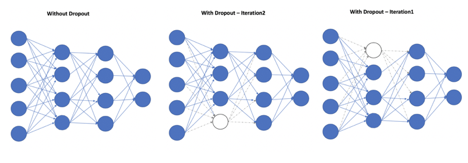


In [10]:
from keras import Sequential
from keras.layers.core import Dropout, Dense

model = Sequential()
model.add(Dense(100, input_dim= 50, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(1,activation="linear"))


### Hyperparameter Optimization : Weight & Bias Initialization

In [13]:
from keras import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(64,activation="relu", input_dim = 32, kernel_initializer = "random_uniform",bias_initializer = "zeros"))
model.add(Dense(1,activation="sigmoid"))

### Grid Search using Keras Wrapper for Sklearn

In [11]:
from keras import Sequential
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Dense
import numpy as np

#Generate dummy data for 3 features and 1000 samples
x_train = np.random.random((1000, 3))

#Generate dummy results for 1000 samples: 1 or 0
y_train = np.random.randint(2, size=(1000, 1))

#Create a python function that returns a compiled DNN model
def create_dnn_model():
    model = Sequential()
    model.add(Dense(12, input_dim=3, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model 

#Use Keras wrapper to package the model as an sklearn object
model = KerasClassifier(build_fn=create_dnn_model)

# define the grid search parameters
batch_size = [32,64,128]
epochs = [15, 30, 60]

#Create a list with the parameters
param_grid =  {"batch_size":batch_size, "epochs":epochs}
#Invoke the grid search method with the list of hyperparameters
grid_model = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
#Train the model
grid_model.fit(x_train, y_train)

#Extract the best model grid search
best_model = grid_model.best_estimator_


Epoch 1/15
Epoch 1/30
Epoch 1/15
Epoch 1/15
666/666 [==============================] - 0s 47us/step - loss: 0.6957 - acc: 0.5135
Epoch 3/15
666/666 [==============================] - 0s 46us/step - loss: 0.6949 - acc: 0.4970
Epoch 4/15
667/667 [==============================] - 0s 729us/step - loss: 0.6940 - acc: 0.5142
Epoch 2/15
Epoch 2/15
666/666 [==============================] - 1s 773us/step - loss: 0.6967 - acc: 0.5195
Epoch 2/30
667/667 [==============================] - 0s 66us/step - loss: 0.6949 - acc: 0.5052
Epoch 3/30
Epoch 3/15
667/667 [==============================] - 0s 59us/step - loss: 0.6946 - acc: 0.5127
Epoch 4/15
666/666 [==============================] - 0s 43us/step - loss: 0.6942 - acc: 0.5030
Epoch 5/30
667/667 [==============================] - 0s 185us/step - loss: 0.6933 - acc: 0.5307
Epoch 3/15
666/666 [==============================] - 0s 256us/step - loss: 0.6942 - acc: 0.5030
Epoch 5/15
667/667 [==============================] - 0s 60us/step - loss: 0.

666/666 [==============================] - 0s 39us/step - loss: 0.6868 - acc: 0.5405
Epoch 30/30
666/666 [==============================] - 0s 18us/step
Epoch 1/30
Epoch 1/30
Epoch 1/60
Epoch 1/60
667/667 [==============================] - 0s 624us/step - loss: 0.7108 - acc: 0.5232
Epoch 2/30
667/667 [==============================] - 0s 37us/step - loss: 0.7038 - acc: 0.5217
Epoch 3/30
666/666 [==============================] - 0s 636us/step - loss: 0.7184 - acc: 0.5120
Epoch 2/60
667/667 [==============================] - 0s 45us/step - loss: 0.6994 - acc: 0.5232
Epoch 4/30
667/667 [==============================] - 0s 46us/step - loss: 0.6980 - acc: 0.5157
Epoch 3/60
666/666 [==============================] - 0s 54us/step - loss: 0.7030 - acc: 0.5060
Epoch 4/60
667/667 [==============================] - 0s 68us/step - loss: 0.6962 - acc: 0.4903
Epoch 6/30
667/667 [==============================] - 1s 825us/step - loss: 0.7137 - acc: 0.5247
Epoch 2/30
667/667 [=======================

666/666 [==============================] - 0s 136us/step - loss: 0.6920 - acc: 0.5225
Epoch 24/60
Epoch 10/60
666/666 [==============================] - 0s 43us/step - loss: 0.6919 - acc: 0.5255
Epoch 25/60
667/667 [==============================] - 0s 61us/step - loss: 0.6927 - acc: 0.5172
Epoch 11/60
667/667 [==============================] - 0s 230us/step - loss: 0.6929 - acc: 0.5232
Epoch 25/30
667/667 [==============================] - 0s 46us/step - loss: 0.6926 - acc: 0.5172
Epoch 12/60
Epoch 26/30
666/666 [==============================] - 0s 137us/step - loss: 0.6917 - acc: 0.5345
Epoch 27/30
Epoch 26/60
667/667 [==============================] - 0s 78us/step - loss: 0.6924 - acc: 0.5157
Epoch 13/60
667/667 [==============================] - 0s 256us/step - loss: 0.6924 - acc: 0.5172
Epoch 22/30
666/666 [==============================] - 0s 73us/step - loss: 0.6916 - acc: 0.5300
Epoch 27/60
667/667 [==============================] - 0s 43us/step - loss: 0.6922 - acc: 0.5292
Ep

/Users/jmoolay/anaconda3/lib/python3.6/site-packages/keras/callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.125650). Check your callbacks.
  % delta_t_median)


666/666 [==============================] - 0s 242us/step - loss: 0.6899 - acc: 0.5511
Epoch 39/60
666/666 [==============================] - 0s 38us/step - loss: 0.6898 - acc: 0.5616
Epoch 40/60
666/666 [==============================] - 0s 37us/step - loss: 0.6897 - acc: 0.5480
Epoch 41/60
667/667 [==============================] - 0s 189us/step - loss: 0.6909 - acc: 0.5232
Epoch 27/60
667/667 [==============================] - 0s 43us/step - loss: 0.6909 - acc: 0.5262
Epoch 28/60
667/667 [==============================] - 0s 38us/step - loss: 0.6908 - acc: 0.5217
Epoch 29/60
666/666 [==============================] - 0s 49us/step - loss: 0.6893 - acc: 0.5631
Epoch 43/60
666/666 [==============================] - 0s 37us/step - loss: 0.6892 - acc: 0.5646
Epoch 44/60
Epoch 30/60
666/666 [==============================] - 0s 39us/step - loss: 0.6890 - acc: 0.5826
Epoch 45/60
667/667 [==============================] - 0s 72us/step - loss: 0.6908 - acc: 0.5187
Epoch 31/60
666/666 [=======

666/666 [==============================] - 0s 23us/step - loss: 0.6919 - acc: 0.5345
Epoch 14/15
666/666 [==============================] - 0s 24us/step - loss: 0.6917 - acc: 0.5405
Epoch 15/15
667/667 [==============================] - 0s 59us/step - loss: 0.6925 - acc: 0.5037
Epoch 10/60
667/667 [==============================] - 0s 38us/step - loss: 0.6923 - acc: 0.5112
Epoch 11/60
667/667 [==============================] - 0s 39us/step - loss: 0.6920 - acc: 0.5097
Epoch 12/60
667/667 [==============================] - 0s 42us/step - loss: 0.6920 - acc: 0.5127
Epoch 13/60
667/667 [==============================] - 0s 39us/step - loss: 0.6917 - acc: 0.5187
Epoch 14/60
667/667 [==============================] - 0s 39us/step - loss: 0.6916 - acc: 0.5157
Epoch 15/60
667/667 [==============================] - 0s 53us/step - loss: 0.6916 - acc: 0.5112
Epoch 16/60
667/667 [==============================] - 0s 42us/step - loss: 0.6913 - acc: 0.5277
Epoch 17/60
667/667 [=====================

667/667 [==============================] - 0s 39us/step - loss: 0.6885 - acc: 0.5397
Epoch 55/60
667/667 [==============================] - 0s 48us/step - loss: 0.6885 - acc: 0.5322
Epoch 56/60
667/667 [==============================] - 0s 42us/step - loss: 0.6884 - acc: 0.5322
Epoch 57/60
667/667 [==============================] - 0s 39us/step - loss: 0.6883 - acc: 0.5352
Epoch 58/60
667/667 [==============================] - 0s 51us/step - loss: 0.6885 - acc: 0.5337
Epoch 59/60
667/667 [==============================] - 0s 40us/step - loss: 0.6883 - acc: 0.5307
Epoch 60/60
667/667 [==============================] - 0s 21us/step
Epoch 1/30
666/666 [==============================] - 1s 1ms/step - loss: 0.7021 - acc: 0.4970
Epoch 2/30
666/666 [==============================] - 0s 34us/step - loss: 0.6990 - acc: 0.4985
Epoch 3/30
666/666 [==============================] - 0s 24us/step - loss: 0.6971 - acc: 0.4940
Epoch 4/30
666/666 [==============================] - 0s 22us/step - loss: 

667/667 [==============================] - 0s 22us/step - loss: 0.6936 - acc: 0.5052
Epoch 16/30
667/667 [==============================] - 0s 23us/step - loss: 0.6934 - acc: 0.5142
Epoch 17/30
667/667 [==============================] - 0s 24us/step - loss: 0.6932 - acc: 0.5112
Epoch 18/30
667/667 [==============================] - 0s 24us/step - loss: 0.6929 - acc: 0.5172
Epoch 19/30
667/667 [==============================] - 0s 22us/step - loss: 0.6928 - acc: 0.5157
Epoch 20/30
667/667 [==============================] - 0s 23us/step - loss: 0.6928 - acc: 0.5127
Epoch 21/30
667/667 [==============================] - 0s 25us/step - loss: 0.6924 - acc: 0.5127
Epoch 22/30
667/667 [==============================] - 0s 22us/step - loss: 0.6923 - acc: 0.5082
Epoch 23/30
666/666 [==============================] - 1s 1ms/step - loss: 0.7111 - acc: 0.5135
Epoch 2/60
667/667 [==============================] - 0s 14us/stepss: 0.7110 - acc: 0.46
Epoch 24/30
666/666 [==============================

667/667 [==============================] - 0s 19us/step - loss: 0.7286 - acc: 0.5202
Epoch 3/60
667/667 [==============================] - 0s 21us/step - loss: 0.7197 - acc: 0.5187
Epoch 4/60
667/667 [==============================] - 0s 35us/step - loss: 0.7124 - acc: 0.5172
Epoch 5/60
667/667 [==============================] - 0s 32us/step - loss: 0.7084 - acc: 0.5112
Epoch 6/60
667/667 [==============================] - 0s 23us/step - loss: 0.7055 - acc: 0.4948
Epoch 7/60
667/667 [==============================] - 0s 22us/step - loss: 0.7032 - acc: 0.4903
Epoch 8/60
667/667 [==============================] - 0s 24us/step - loss: 0.7019 - acc: 0.5007
Epoch 9/60
667/667 [==============================] - 0s 23us/step - loss: 0.7011 - acc: 0.4993
Epoch 10/60
667/667 [==============================] - 0s 21us/step - loss: 0.7003 - acc: 0.4993
Epoch 11/60
667/667 [==============================] - 0s 22us/step - loss: 0.6999 - acc: 0.5022
Epoch 12/60
667/667 [============================

Epoch 52/60
667/667 [==============================] - 0s 24us/step - loss: 0.6890 - acc: 0.5202
Epoch 21/60
667/667 [==============================] - 0s 24us/step - loss: 0.6924 - acc: 0.5202
Epoch 53/60
667/667 [==============================] - 0s 24us/step - loss: 0.6890 - acc: 0.5157
Epoch 22/60
667/667 [==============================] - 0s 24us/step - loss: 0.6924 - acc: 0.5187
Epoch 54/60
667/667 [==============================] - 0s 24us/step - loss: 0.6889 - acc: 0.5097
Epoch 23/60
666/666 [==============================] - 0s 203us/step - loss: 0.6938 - acc: 0.4775
Epoch 9/15
666/666 [==============================] - 0s 28us/step - loss: 0.6937 - acc: 0.4865
Epoch 10/15
666/666 [==============================] - 0s 25us/step - loss: 0.6935 - acc: 0.4940
Epoch 11/15
666/666 [==============================] - 0s 13us/step - loss: 0.6934 - acc: 0.5030
Epoch 12/15
666/666 [==============================] - 0s 13us/step - loss: 0.6931 - acc: 0.4955
Epoch 13/15
666/666 [=========

666/666 [==============================] - 1s 900us/step - loss: 0.6986 - acc: 0.5060
Epoch 2/30
666/666 [==============================] - 0s 21us/step - loss: 0.6961 - acc: 0.5150
Epoch 3/30
666/666 [==============================] - 0s 18us/step - loss: 0.6945 - acc: 0.5345
Epoch 4/30
Epoch 3/15
666/666 [==============================] - 0s 16us/step - loss: 0.6932 - acc: 0.5420
Epoch 5/30
667/667 [==============================] - 0s 34us/step - loss: 0.6988 - acc: 0.5262
Epoch 4/15
666/666 [==============================] - 0s 21us/step - loss: 0.6928 - acc: 0.5390
Epoch 6/30
667/667 [==============================] - 0s 30us/step - loss: 0.6973 - acc: 0.5247
Epoch 7/30
Epoch 5/15
667/667 [==============================] - 0s 24us/step - loss: 0.6964 - acc: 0.5262
Epoch 6/15
667/667 [==============================] - 0s 15us/step - loss: 0.6957 - acc: 0.5292
Epoch 7/15
667/667 [==============================] - 0s 17us/step - loss: 0.6952 - acc: 0.5292
Epoch 8/15
667/667 [========

667/667 [==============================] - 0s 13us/step - loss: 0.6972 - acc: 0.5247
Epoch 8/30
667/667 [==============================] - 0s 27us/step - loss: 0.6965 - acc: 0.5202
Epoch 9/30
667/667 [==============================] - 0s 13us/step - loss: 0.6959 - acc: 0.5187
Epoch 10/30
667/667 [==============================] - 0s 13us/step - loss: 0.6955 - acc: 0.5172
Epoch 11/30
667/667 [==============================] - 0s 13us/step - loss: 0.6953 - acc: 0.5112
Epoch 12/30
667/667 [==============================] - 0s 16us/step - loss: 0.6951 - acc: 0.5052
Epoch 13/30
667/667 [==============================] - 0s 17us/step - loss: 0.6949 - acc: 0.5007
Epoch 14/30
667/667 [==============================] - 0s 15us/step - loss: 0.6948 - acc: 0.5022
Epoch 15/30
667/667 [==============================] - 0s 14us/step - loss: 0.6947 - acc: 0.4933
Epoch 16/30
667/667 [==============================] - 0s 14us/step - loss: 0.6946 - acc: 0.4858
Epoch 17/30
667/667 [=======================

666/666 [==============================] - 0s 15us/step - loss: 0.6928 - acc: 0.5180
Epoch 32/60
667/667 [==============================] - 0s 14us/step - loss: 0.6919 - acc: 0.5172
Epoch 33/60
Epoch 28/60
666/666 [==============================] - 0s 16us/step - loss: 0.6926 - acc: 0.5270
Epoch 29/60
Epoch 34/60
667/667 [==============================] - 0s 15us/step - loss: 0.6918 - acc: 0.5292
Epoch 30/60
666/666 [==============================] - 0s 25us/step - loss: 0.6926 - acc: 0.5330
Epoch 35/60
667/667 [==============================] - 0s 19us/step - loss: 0.6917 - acc: 0.5322
Epoch 31/60
667/667 [==============================] - 0s 13us/step - loss: 0.6916 - acc: 0.5307
Epoch 36/60
Epoch 32/60
667/667 [==============================] - 0s 14us/step - loss: 0.6915 - acc: 0.5367
Epoch 33/60
667/667 [==============================] - 0s 13us/step - loss: 0.6915 - acc: 0.5412
Epoch 37/60
Epoch 34/60
666/666 [==============================] - 0s 14us/step - loss: 0.6919 - acc: 0

Epoch 20/60
Epoch 54/60
667/667 [==============================] - 0s 17us/step - loss: 0.6919 - acc: 0.5337
Epoch 21/60
667/667 [==============================] - 0s 19us/step - loss: 0.6919 - acc: 0.5277
Epoch 22/60
666/666 [==============================] - 0s 110us/step - loss: 0.6894 - acc: 0.5405
Epoch 57/60
Epoch 23/60
666/666 [==============================] - 0s 18us/step - loss: 0.6893 - acc: 0.5375
Epoch 56/60
Epoch 58/60
666/666 [==============================] - 0s 15us/step - loss: 0.6892 - acc: 0.5375
Epoch 24/60
667/667 [==============================] - 0s 15us/step - loss: 0.6902 - acc: 0.5172
Epoch 59/60
Epoch 57/60
667/667 [==============================] - 0s 17us/step - loss: 0.6901 - acc: 0.5142
Epoch 60/60
Epoch 58/60
667/667 [==============================] - 0s 16us/step - loss: 0.6901 - acc: 0.5172
Epoch 59/60
667/667 [==============================] - 0s 19us/step - loss: 0.6916 - acc: 0.5352
Epoch 26/60
667/667 [==============================] - 0s 19us/ste

1000/1000 [==============================] - 0s 14us/step - loss: 0.6901 - acc: 0.5180
Epoch 27/60
1000/1000 [==============================] - 0s 17us/step - loss: 0.6902 - acc: 0.5240
Epoch 28/60
1000/1000 [==============================] - 0s 17us/step - loss: 0.6899 - acc: 0.5230
Epoch 29/60
1000/1000 [==============================] - 0s 17us/step - loss: 0.6899 - acc: 0.5230
Epoch 30/60
1000/1000 [==============================] - 0s 19us/step - loss: 0.6898 - acc: 0.5260
Epoch 31/60
1000/1000 [==============================] - 0s 16us/step - loss: 0.6897 - acc: 0.5310
Epoch 32/60
1000/1000 [==============================] - 0s 17us/step - loss: 0.6897 - acc: 0.5220
Epoch 33/60
1000/1000 [==============================] - 0s 15us/step - loss: 0.6897 - acc: 0.5340
Epoch 34/60
1000/1000 [==============================] - 0s 17us/step - loss: 0.6895 - acc: 0.5310
Epoch 35/60
1000/1000 [==============================] - 0s 16us/step - loss: 0.6895 - acc: 0.5290
Epoch 36/60
1000/1000 

### Saving the best model based on validation accuracy during training

In [ ]:
from keras.callbacks import ModelCheckpoint

filepath = "ModelWeights-{epoch:.2f}-{val_acc:.2f}.hdf5"
checkpoint = ModelCheckpoint(filepath, save_best_only=True, monitor="val_acc")

model.fit(x_train, y_train, callbacks=[checkpoint],epochs=100, batch_size=64)


### Saving the model (weights and structure) after training

In [ ]:
from keras.models import load_model
#Train a model for defined number of epochs
model.fit(x_train, y_train, epochs=100, batch_size=64)

# Saves the entire model into a file named as  'dnn_model.h5'
model.save('dnn_model.h5')  

# Later, (maybe another day), you can load the trained model for prediction.
model = load_model('dnn_model.h5')
